# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED;font-size:220%; text-align:center; border-radius: 15px 55px;">Diabetes | EDA & Prediction</p>

# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚛ Dataset Explanation ⚛</p>

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Explanation of the Variables </center></h2> 
    
* ****Pregnancies:**** Number of times pregnant
* ****Glucose:**** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* ****Blood Pressure:**** Diastolic blood pressure (mm Hg)
* ****SkinThickness:**** Triceps skin fold thickness (mm)
* ****Insulin:**** 2-Hour serum insulin (mu U/ml)
* ****DiabetsPedigreeFunction:**** A function that calculates the probability of having diabetes according to one's descendants
* ****BMI:**** Body mass index (weight in kg/(height in m)^2)
* ****Age:**** Age (years)
* ****Outcome:**** Class variable (0 or 1)

In addition to the information given above, we should also know the BMI scale. The image below shows its classes that will be useful to us in data preprocessing.

<img src="https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg?_=07167" width="900" align="center">

As for the narrowed down projects that contain static components, the steps after Test Model can be excluded. Many portfolio projects in Kaggle can be given as an example for this approach and our project will be designed accordingly. 

<a id = "1"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ☀ Import Libraries ☀</p>

In [1]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "YlGnBU"

#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

#Metrics, Preprocessing and Tuning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Customization
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored

We have imported the necessary libraries. As you can realize, they were categorized according to their utilizatons. Let's explain that. 

In the early stages of machine learning projects in Python, developers would generally used Numpy, Pandas, Matplotlib and then Seaborn. As a result, they became the backbone of the many core elements in terms of mathematical operations, data manipulations and visualizations. Later on, many more libraries have been developed and begun to be used by the community. 

These classic libraries are still the most important components of ML projects and competitive alternatives to Numpy and Pandas have yet to exist. However, despite their functionalities, Matplotlib and Seaborn lack interactivity and some aesthetical features. That's why, Plotly have become one of the most popular visualization tools in data science in the recent years. There are also many useful alternatives like Altair, Gleam, GGPlot etc.

On the other hand, we generally use Sklearn to model data. It includes classic machine learning algorithms like Logistic Regression, Decision Trees, KNN etc and tools for metrics, data preprocessing and tuning. Additionally, we have many modern algorithms coming from separate libraries like CatBoost, LGBM, XGBoost etc. 

For customized purposes like printing colorful strings and excluding warning messages due to depreciated functions, we are going to use Warnings and Termcolor.

<a id = "2"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⇣ Load and Check Data ⇣</p>

In [2]:
diabetes = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df = diabetes.copy()

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After loading data, we should copy it and create a separate variable. If we run into a problem because of preprocessing steps or wrong codes etc, this operation will enable us to read original data from the backup dataset.

In [4]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())
    
check_data(df)

********************************************************************************
DIMENSION: (768, 9)
********************************************************************************
COLUMNS:

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
********************************************************************************
DATA INFO:

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
********************************************************************************
MISSING VALUES:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI        

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

--------------------- RESULT ---------------------
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
--------------------------------------------------


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Summary of the Dataset </center></h2> 
    
 * <b> The dataset consists of 768 rows and 8 columns </b>
 * <b> The target variable is Outcome, which contains categorical binary values 0 and 1 </b>
 * <b> The variables other than Outcome are numerical </b> 
 * <b> There are technically no missing values because of lack NaN values, however when we examine closely, some 0's in the dataset indicate they are actually missing values </b>
 * <b> Descriptive statistics show that some features may have outliers (for example, 17 pregnancies can be an outlier) </b>

<a id = "3"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚡ Exploratory Data Analysis (EDA) ⚡</p>

In [7]:
def tar_var_summary(df, tar_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']
    
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])
    
    x = [str(i) for i in df[tar_var].value_counts().index]
    y = df[tar_var].value_counts().values.tolist()
    
    fig.add_trace(go.Bar(x = x, y = y, text = y, 
                         textposition = "auto",
                       showlegend = False,
                        marker=dict(color=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=1)
    
    fig.add_trace(go.Pie(labels = df[tar_var].value_counts().keys(),
                         values = df[tar_var].value_counts().values,
                         pull = [0, 0.25],
                         hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=2)

    
    fig.update_layout(title={'text': "Distribution of the Target Variable",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)

In [8]:
tar_var_summary(df, "Outcome")

In [9]:
def num_var_summary(df, num_var):
    fig = make_subplots(rows = 1, cols = 2,
                       subplot_titles = ("Quantiles", "Distribution"))
    
    fig.add_trace(go.Box(y = df[num_var],
                         name = str(num_var),
                         showlegend = False,
                         marker_color = "#A6D0DD"), 
                         row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = df[num_var],
                               xbins = dict(start = df[num_var].min(),
                                            end = df[num_var].max()),
                               showlegend = False,
                               name = str(num_var),
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': num_var.capitalize(),
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)

In [10]:
for i in num_cols:
    num_var_summary(df, i)

In [11]:
def num_features(df, num_var, tar_var):
    x0 = df[df[tar_var]==0][num_var]
    x1 = df[df[tar_var]==1][num_var] 
    
    trace1 = go.Histogram(x = x0,
                               name = "0",
                               opacity = 0.75,
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))
                                           
    trace2 = go.Histogram(x = x1,
                               name = "1",
                               opacity = 0.75,
                               marker=dict(color="#A6D0DD",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))
                                           
    data = [trace1, trace2]
                                           
    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')
                                           
    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)

In [12]:
for i in num_cols:
    num_features(df, i, "Outcome")

<Axes: >

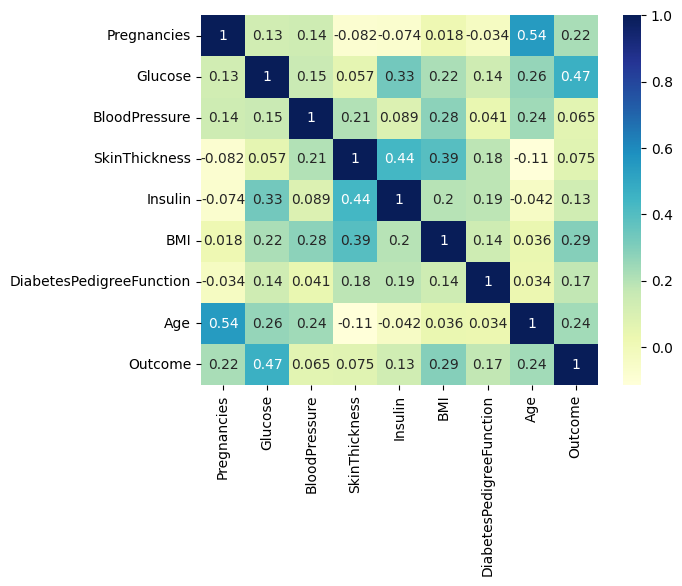

In [13]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [14]:
df.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
colors = ['#654E92','#6C9BCF','#A5C0DD','#EBD8B2']
fig = go.Figure(data=go.Splom(dimensions=[dict(label=col,
                                               values=df[col]) for col in 
                                          df[num_cols].select_dtypes(include = ['int', 'float']).columns
                                         ],
                showupperhalf = True, 
                text = df['Outcome'],
                marker = dict(color = [colors[i] for i in df['Outcome']. \
                                     astype('category').cat.codes],
                            showscale = False,
                            opacity = 0.65)
                             )
               )

fig.update_layout(title = {'text': 'Pairwise Relationships by Outcome',
                          'xanchor': 'center',
                          'yanchor': 'top',
                          'x': 0.5,
                          'y': 0.95},
                  width = 950,
                  height = 950,
                  template = 'plotly_dark')

iplot(fig)

In [16]:
def detect_outliers(df, num_var):
    
    trace0 = go.Box(
        y = df[num_var],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = '#a2b9bc'),
        line = dict(
            color = '#6b5b95')
    )

    trace1 = go.Box(
        y = df[num_var],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = '#b2ad7f'),
        line = dict(
            color = '#feb236')
    )

    trace2 = go.Box(
        y = df[num_var],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = '#b5e7a0',
            outliercolor = '#878f99',
            line = dict(
                outliercolor = '#d64161',
                outlierwidth = 2)),
        line = dict(
            color = '#86af49')
    )

    trace3 = go.Box(
        y = df[num_var],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = '#6b5b95'),
        line = dict(
            color = '#ff7b25')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(num_var)
    )
    
    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')

    fig = go.Figure(data=data,layout=layout)
    
    iplot(fig)

In [17]:
for i in num_cols:
    detect_outliers(df, i)

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Observations from Exploratory Data Analysis </center></h2> 
    
 * <b> There are no highly correlated independent variables. </b>
 * <b> The presence of outliers that can affect the models draw attention. </b>
 * <b> Despite the fact that some values like Glucose, BMI etc. that can't have the value 0, we see that these features contain 0's. So, we should handle them in the feature engineering step. </b>

<a id = "4"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⛏ Data Preprocessing ⛏</p>

In [18]:
missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[missing_values] = np.where(df[missing_values] == 0, np.nan, df[missing_values])

<Axes: >

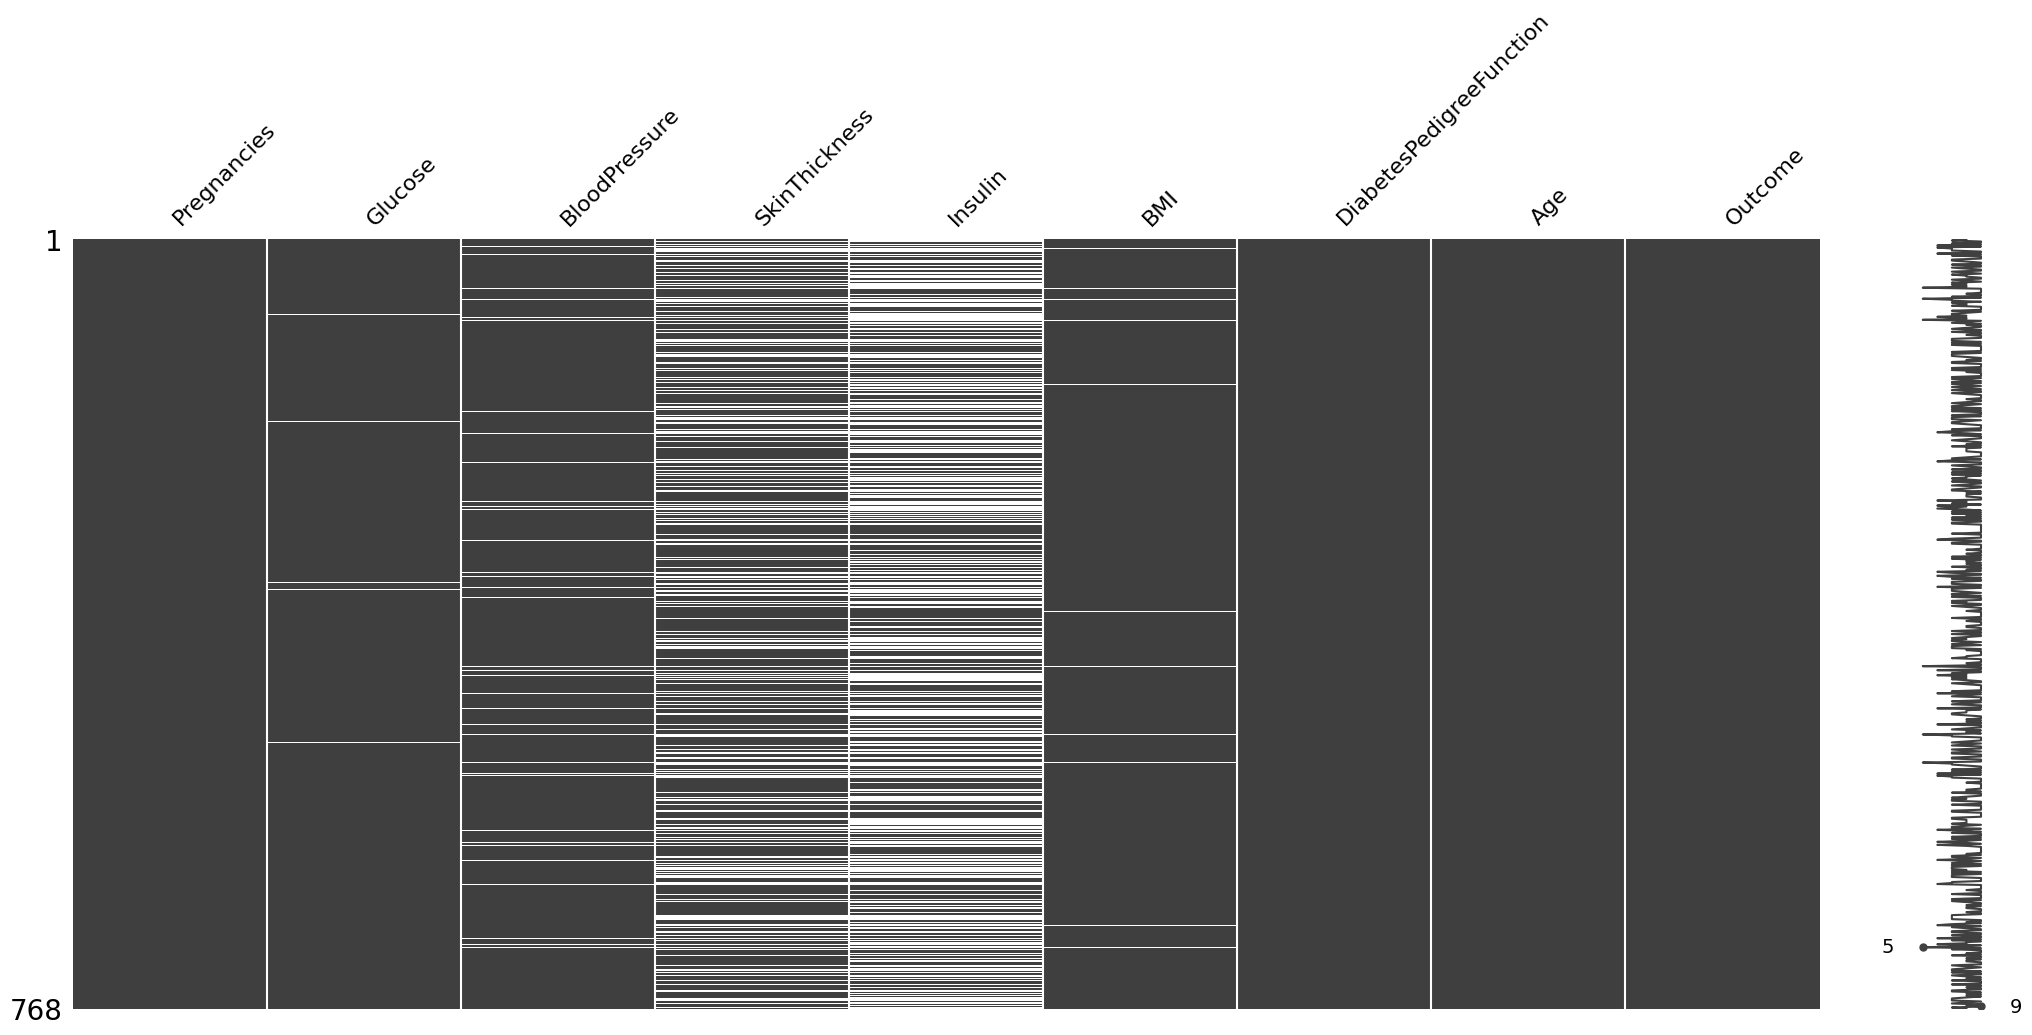

In [19]:
msno.matrix(df)

In [20]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [21]:
missing_percentage(df)

,Total,Percent
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65


In [22]:
df.loc[df.Age.between(18,31), "AgeGroup"] = "Young"
df.loc[df.Age.between(31,46), "AgeGroup"] = "MiddleAge"
df.loc[df.Age.between(46,66), "AgeGroup"] = "LateMiddleAge"
df.loc[df.Age >= 66,"AgeGroup"] = "Old"

In [23]:
df['Insulin'] = df['Insulin'].fillna(df.groupby(["AgeGroup", "Outcome"])['Insulin'].transform('median'))
df['Insulin'] = df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median')) 
df['SkinThickness'] = df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'))  
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby("Outcome")["BloodPressure"].transform('median'))
df['BMI'] = df['BMI'].fillna(df.groupby(["AgeGroup", "Outcome"])['BMI'].transform('median'))
df["Glucose"] = df["Glucose"].fillna(df.groupby("Outcome")["Glucose"].transform('median'))

In [24]:
df.loc[df.BMI < 18.5, "BMIClass"] = "Underweight"
df.loc[df.BMI.between(18.5, 25.0), "BMIClass"] = "Normal"
df.loc[df.BMI.between(25.0, 30.0), "BMIClass"] = "Overweight"
df.loc[df.BMI.between(30.0, 35.0), "BMIClass"] = "Obese"
df.loc[df.BMI >= 35.0 , "BMIClass"] = "ExtremelyObese"

df.loc[df.Insulin < 120  , 'InsulinThreshold'] ="Below"
df.loc[df.Insulin >= 120 , 'InsulinThreshold'] ="Above"

df.loc[df.Pregnancies > 0, "HasChild"] = "Yes"
df.loc[df.Pregnancies == 0, "HasChild"] = "No"

df.loc[df.BMI < 30, "IsObese"] = "No"
df.loc[df.BMI >= 30, "IsObese"] = "Yes"

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMIClass,InsulinThreshold,HasChild,IsObese
0,6,148.0,72.0,35.0,199.5,33.6,0.627,50,1,LateMiddleAge,Obese,Above,Yes,Yes
1,1,85.0,66.0,29.0,115.0,26.6,0.351,31,0,MiddleAge,Overweight,Below,Yes,No
2,8,183.0,64.0,32.0,168.0,23.3,0.672,32,1,MiddleAge,Normal,Above,Yes,No
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young,Overweight,Below,Yes,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,MiddleAge,ExtremelyObese,Above,No,Yes


In [26]:
missing_percentage(df)

,Total,Percent


In [27]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df[num_cols].columns:
    replace_with_thresholds(df, col, q1 = 0.1, q3 = 0.9)

In [28]:
def cat_var_summary(df, cat_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']
    
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])
    
    x = [str(i) for i in df[cat_var].value_counts().index]
    y = df[cat_var].value_counts().values.tolist()
    
    fig.add_trace(go.Bar(x = x, y = y, text = y, 
                         textposition = "auto",
                       showlegend = False,
                        marker=dict(color=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=1)
    
    fig.add_trace(go.Pie(labels = df[cat_var].value_counts().keys(),
                         values = df[cat_var].value_counts().values, 
                         hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=2)

    
    fig.update_layout(title={'text': cat_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)

In [29]:
for i in ["BMIClass", "AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]:
    cat_var_summary(df, i)

In [30]:
cat_cols = ["BMIClass", "AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]
df = pd.get_dummies(df, columns=cat_cols)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIClass_ExtremelyObese,...,AgeGroup_LateMiddleAge,AgeGroup_MiddleAge,AgeGroup_Old,AgeGroup_Young,InsulinThreshold_Above,InsulinThreshold_Below,HasChild_No,HasChild_Yes,IsObese_No,IsObese_Yes
0,6.0,148.0,72.0,35.0,199.5,33.6,0.627,50.0,1,False,...,True,False,False,False,True,False,False,True,False,True
1,1.0,85.0,66.0,29.0,115.0,26.6,0.351,31.0,0,False,...,False,True,False,False,False,True,False,True,True,False
2,8.0,183.0,64.0,32.0,168.0,23.3,0.672,32.0,1,False,...,False,True,False,False,True,False,False,True,True,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,False,...,False,False,False,True,False,True,False,True,True,False
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1,True,...,False,True,False,False,True,False,True,False,False,True


In [32]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [33]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Summary </center></h2> 
    
* <b> Initially, we checked the missing values that can't be directly discerned. Then filled them with median. </b>
* <b> Created new features to increase the accuracy. </b>
* <b> Replaced outliers in accordance with a low threshold value. </b>
* <b> Scaled data and split it into test and train data. </b>    
* <b> Now, we are ready for modeling. </b>

<a id = "5"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ☣ Models ☣</p>

In [34]:
def model_performance(model):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Confusion Matrix", "Metrics"))
    
    confusion = confusion_matrix(y_test, y_pred)
    tp = confusion[1,1]
    fn = confusion[1,0]
    fp = confusion[0,1]
    tn = confusion[0,0]
    accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    precision =  (tp/(tp+fp))
    recall    =  (tp/(tp+fn))
    f1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    colors = ['#93e4c1', '#3baea0', '#118a7e', '#1f6f78']

    show_metrics = pd.DataFrame(data=[[accuracy , precision, recall, f1_score]])
    show_metrics = show_metrics.T

    fig.add_trace(go.Heatmap(z = confusion  ,x = ["0 (pred)","1 (pred)"],
                         y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                         colorscale="darkmint", showscale  = False), 
                         row = 1, col = 1)
    for i in range(len(confusion)):
        for j in range(len(confusion[i])):
            fig.add_annotation(
            x=j,
            y=i,
            text=str(confusion[i][j]),
            showarrow=False,
            font=dict(color='black', size=15)
        )

    fig.add_trace(go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], 
                    text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='white'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='white',width=1.5))), row = 1, col = 2)
    
    fig.update_layout(title={'text': model.__class__.__name__,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)                       

In [35]:
random_state = 42
models = [BernoulliNB(), 
          DecisionTreeClassifier(random_state = random_state),
          SVC(random_state = random_state, probability = True),
          RandomForestClassifier(random_state = random_state),
          LogisticRegression(random_state = random_state),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state = random_state),
          AdaBoostClassifier(random_state = random_state),
          XGBClassifier(random_state = random_state),
         ExtraTreesClassifier(random_state = random_state)]

In [36]:
for model in models:
    model_performance(model)

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Result </center></h2> 
    
* <b> After trying various algorithms, Random Forest gave us a roughly 88% accuracy rate. It can be increased by creating new features or adding relevant external data to the model. Beside them, we can use stacking or tuning methods, but they won't be included in this project. </b>